## Дерево принятия решений

До этого в линейных моделях мы находили значение целевого признака как сумму признаков, обладающих весами, то деревья принятия решений используют кардинально другой - **сценарный подход** 

В библиотеке sklearn стандартное дерево решений находится в модуле `tree`

Рассмотрим решающие деревья на знакомой нам задаче бинарной классификации рака груди, на примере `DecisionTreeClassifier`

Параметры алгоритма: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [1]:
# Импорт данных
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X, y = load_breast_cancer(return_X_y = True, as_frame = True)

print(X.info())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 123)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [2]:
# Импортируем деревья
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

pred = model.predict(X_test)

Деревья можно визуализировать при помощи функции `plot_tree()` 

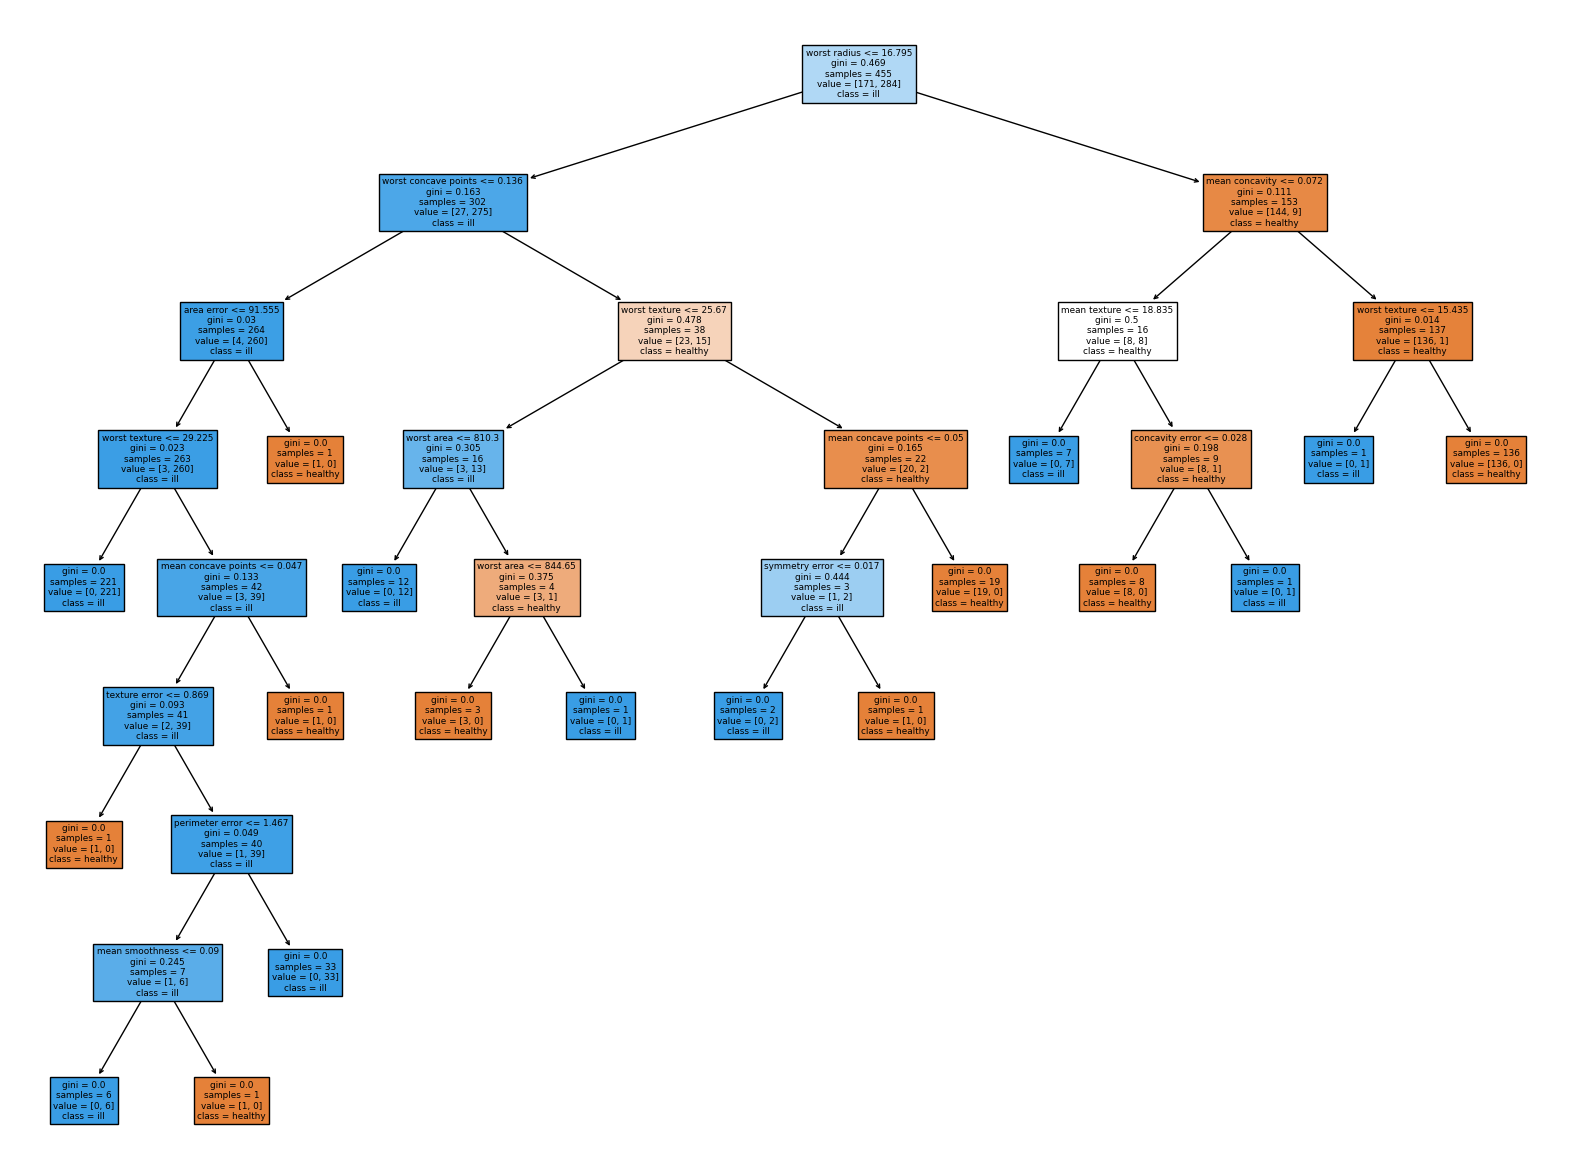

In [3]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize = (20,15)) 
plot_tree(model, filled=True, feature_names = X_train.columns, class_names = ['healthy', 'ill'])
plt.show() 

## Усредняющие методы и бусты

-    Усредняющие методы - Независимо друг от друга обучаем несколько эстиматоров и затем усредняем их предсказания.
-    Бусты - Эстиматоры строятся один за другим, каждый последующий обучается на ошибке предыдущего


Оба метода находятся в модуле `ensemble`


Сравним точность предсказания модели построенной на решающем дереве и случайного леса `RandomForestClassifier`

In [4]:
# Импорт случайного леса
from sklearn.ensemble import RandomForestClassifier

# roc_auc_score для оценки моделей
from sklearn.metrics import roc_auc_score

random_forest = RandomForestClassifier(random_state = 12)

random_forest.fit(X_train, y_train)


print("roc auc для модели на решающих деревьях:", roc_auc_score(pred, y_test))
print("roc auc для случайного леса:", roc_auc_score(random_forest.predict(X_test), y_test))

roc auc для модели на решающих деревьях: 0.9619111259605746
roc auc для случайного леса: 0.9932432432432432


## Кодирование признаков

Почти никакие алгоритмы не могут работать с категориальными переменными, чтобы привести категориальные переменные к понятному алгоритму виду применяют различные кодирования

## One-hot encoding

Столбец с категориальной переменной заменяется на n(кол-во категорий) столбцов из нулей и единиц, которые обозначают вхождение признака

В `pandas` для этого есть функция `get_dummies()`

In [14]:
import pandas as pd

# Создадим категориальную переменную
class_data = pd.DataFrame({"class" : ['business', 'economy', 'economy', 'None', 'economy', 'economy_plus']})

class_data.head(10)


,class
0,business
1,economy
2,economy
3,None
4,economy
5,economy_plus


In [15]:
pd.get_dummies(class_data['class'])

,None,business,economy,economy_plus
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,1,0,0,0
4,0,0,1,0
5,0,0,0,1


**Важно!** При применении OHE создаются новые столбцы (признаки), которые сильно связаны между собой. Возникает проблема коллинеарности признаков: https://ru.wikipedia.org/wiki/%D0%9C%D1%83%D0%BB%D1%8C%D1%82%D0%B8%D0%BA%D0%BE%D0%BB%D0%BB%D0%B8%D0%BD%D0%B5%D0%B0%D1%80%D0%BD%D0%BE%D1%81%D1%82%D1%8C

## Ordinal encoding

Заменяет столбец с категориальной переменной на столбец с номером этого признака

В `sklearn` этот метод находится в модуле `preprocessing`

In [18]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

class_data['class_encoded'] = encoder.fit_transform(class_data)

class_data.head(10)

,class,class_encoded
0,business,1.0
1,economy,2.0
2,economy,2.0
3,None,0.0
4,economy,2.0
5,economy_plus,3.0


## Масштабирование признаков

Линейные модели по своему принципу очень чувствительны к выбросам и разбросу данных. Также разные признаки могут быть в разных масштабах: одна колонка - часы, вторая - километры. Для того, чтобы избежать ошибки, возникающей из-за разного масшата признаков, их **нормализуют**

Нормализация происходит следующим образом: $$ x_n = \frac{x-M}{\sigma}$$

Где $M$ - мат. ожидание (среднее значение) признака и $\sigma$ - стандартное отклонение

Эту операцию можно сделать и руками (**ваше домашнее задание**), а можно использовать класс `StandardScaler()`

In [20]:
from sklearn.preprocessing import StandardScaler

data = pd.DataFrame({'distance' : [100, 200, 300, 123],
                    'time' : [1, 2, 3, 1.23]})

scaler = StandardScaler()

data_scaled = scaler.fit_transform(data)

data_scaled

array([[-1.03290876, -1.03290876],
       [ 0.24623522,  0.24623522],
       [ 1.52537919,  1.52537919],
       [-0.73870565, -0.73870565]])